# Coffee Quality Data Analysis

The analyzed dataset contains coffee quality data scraped from the Coffee Quality Institute (CQI) from May 2023. Dataset has been imported from [Kaggle](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi).

**Analysis wordcount**: 406

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Load the data
df = pd.read_csv("df_arabica.csv")
df

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In the initial code block data analytics and visualization libraries are imported. After that I load the dataset to a pandas dataframe from a csv file.

I examine the data by invoking the dataframe to get a first outlook. This dataset has a lot of columns, some missing values and some unstandard values - some cleaning will be needed.

In [141]:
# Drop the columns that are not needed

df_clean = df.drop(["Certification Address", "Certification Body", "Expiration", "Certification Contact", "Lot Number", "Producer", "Bag Weight", "In-Country Partner", "Mill", "ICO Number", "Number of Bags", "Status", "Farm Name", "Company", "Unnamed: 0", "ID", "Owner", "Grading Date"], axis=1)

print(df_clean.columns)


Index(['Country of Origin', 'Altitude', 'Region', 'Harvest Year', 'Variety',
       'Processing Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects'],
      dtype='object')


In this block I decided to drop some unuseful columns and cloned the dataframe into a new variable "df_clean" only keeping the useful columns. I printed the remaining columns to decide further course of analysis. The dataset contains a mix of numerical and categorical data.

In [142]:
# Check for missing values

print(df_clean.isna().sum())

df_clean = df_clean.dropna()
print(df_clean.isna().sum())

# Check for duplicate rows

print(df_clean.duplicated().sum())



Country of Origin       0
Altitude                1
Region                  2
Harvest Year            0
Variety                 6
Processing Method       5
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
dtype: int64
Country of Origin       0
Altitude                0
Region                  0
Harvest Year            0
Variety                 0
Processing Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0

## Data Cleaning

This block initiates the data cleaning step. I check for missing or null values using the .isna() method and then print the summary of missing values for each column. I decided to drop the rows with missing values because the dataset is sufficiently big and should not be affected by the removal.

I also check for duplicate rows, but didn’t find any. Finally I print summary again to confirm that all missing values have been removed.

In [ ]:
# Clean "Country of Origin" column

df_clean["Country of Origin"] = df_clean["Country of Origin"].str.lower()
df_clean["Country of Origin"] = df_clean["Country of Origin"].str.strip()


# Clean "Variety" column

df_clean["Variety"] = df_clean["Variety"].str.lower()
df_clean["Variety"] = df_clean["Variety"].str.strip()


# Replace duplicates or similar values with a single value

variety_normalization = {
    "sl34+gesha": "sl34",
    "wolishalo,kurume,dega": "mixed",
    "castillo and colombia blend": "mixed",
    "catimor,catuai,caturra,bourbon": "mixed",
    "marsellesa, catuai, caturra & marsellesa, anacafe 14, catuai": "mixed",
    "red bourbon,caturra": "caturra",
    "bourbon, catimor, caturra, typica": "mixed",
    "caturra-catuai": "caturra",
    "sl28,sl34,ruiru11": "mixed",
    "typica bourbon caturra catimor": "mixed",
    "caturra,colombia,castillo": "mixed",
    "castillo,caturra,bourbon": "mixed",
    "catuai and mundo novo": "mixed",
    "typica + sl34": "mixed",
    "unknown": "mixed",
    "nan": "mixed",
    "jember,tim-tim,ateng": "mixed",
    "unknow": "mixed",
    "catucai": "catuai",
    "yellow catuai": "catuai",
    "castillo paraguaycito": "castillo",
}

df_clean["Variety"] = df_clean["Variety"].replace(variety_normalization)

df_clean["Variety"].unique()


array(['castillo', 'gesha', 'java', 'red bourbon', 'sl34', 'bourbon',
       'ethiopian heirlooms', 'caturra', 'mixed', 'typica', 'catimor',
       'sl28', 'sl14', 'catuai', 'yellow bourbon', 'catrenic', 'pacamara',
       'bourbon, caturra y catimor', 'bourbon sidra', 'sarchimor',
       'parainema', 'shg', 'mundo novo', 'lempira', 'typica gesha',
       'gayo', 'maragogype', 'santander', 'pacas'], dtype=object)

### Country of Origin, Variety Cleaning and Normalization

Here I look more closely at specific columns that I will be using later, such as "Country of Origin" and "Variety".

I convert all strings to lowercase and strip them of any unwanted whitespaces.

The "Variety" column contains a lot of unstandard and duplicate values - to solve this I create a dictionary where I replace unstandard expressions with clearer ones. I perform the replace and check unique values of the "Variety" column.

In [ ]:
# Clean "Processing Method" column

df_clean["Processing Method"] = df_clean["Processing Method"].str.lower()
df_clean["Processing Method"] = df_clean["Processing Method"].str.strip()

processing_method_normalization = {
    "natural / dry": "natural",
    "natural": "natural",
    "washed / wet": "washed",
    "washed": "washed",
    "pulped natural / honey": "honey",
    "semi-lavado": "honey",
    "wet hulling": "wet-hulled",
    "double carbonic maceration / natural": "carbonic maceration",
    "honey,mossto": "honey",
    "nan": "other",
    "anaerobico 1000h": "anaerobic",
    "double anaerobic washed": "anaerobic",
}

df_clean["Processing Method"] = df_clean["Processing Method"].replace(processing_method_normalization)

df_clean["Processing Method"].unique()

array(['anaerobic', 'washed', 'semi washed', 'honey', 'natural',
       'carbonic maceration', 'wet-hulled'], dtype=object)

### Processing Method Cleaning and Normalization

Here I perform similar cleaning and normalization on the "Processing Method" column. Again some processing methods were unstandard or expressed with slight difference in the text. This normalization allows me to unify the "Processing Method" column and ulitimately achieve clearer results.

Finally I checked the unique values of this column to confirm the results of cleaning and normalization. The normalization was succesful and now we have much less unique values to work with.

In [145]:
# Convert and clean "Altitude" column
df_clean["Altitude"]

# Altitude column needs to be converted to numerical values
# A function to convert the Altitude column to a single number

def convert_altitude(altitude_str):
    try:
        # If there's a range (contains '-')
        if "-" in str(altitude_str):
            # Split the range and convert to numbers
            low, high = map(float, altitude_str.split("-"))
            # Return the mean
            return (low + high) / 2
        # If it's a single number
        else:
            return float(altitude_str)
    except:
        return None

# Apply the conversion to the Altitude column
df_clean["Altitude"] = df_clean["Altitude"].apply(convert_altitude)


# Print some examples to verify
print(df_clean[["Altitude"]].head(20))

    Altitude
0     1815.0
1     1200.0
2     1300.0
3     1900.0
4     1975.0
5     1668.0
6     1250.0
7     1200.0
8     1250.0
9     1550.0
10    2000.0
11    2000.0
12    1250.0
13    1950.0
14    1850.0
15    1100.0
16    2000.0
17    1300.0
18    1200.0
19    1585.0


### Altitude Column Cleaning and Transformation

After examining the "Altitude" column I found out that it contains some numerical values formatted as a string (such as "1700 - 900") representing the range of altitudes where the coffees had grown. For further analysis, this column needs to be cleaned and converted to numerical values.

I created a function that checks if there is a "-" symbol present in the values (this would mean it is a range). If there is a dash present, the function breaks the text into a low and high values, converts them to a float type and computes the mean of high and low value. This mean then replaces former range values and makes further analysis easier.

In the end I printed some values from the "Altitude" column to check and verify that the fuction worked properly.

In [146]:
# Descriptive statistics of numerical columns

desc_stats = df_clean.describe()
desc_stats

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,194.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.0,196.0,196.000000,196.0,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1298.373711,7.722806,7.748673,7.602755,7.690357,7.645816,7.647908,9.989796,10.0,10.0,7.679490,0.0,83.726224,10.694898,0.127551,0.688776,2.260204
std,681.049438,0.290239,0.278657,0.276798,0.258216,0.230840,0.257131,0.106154,0.0,0.0,0.308274,0.0,1.728620,1.259863,0.589703,1.718699,2.976601
min,139.000000,6.500000,6.750000,6.670000,6.830000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.000000,0.000000,0.000000,0.000000
50%,1321.250000,7.670000,7.750000,7.580000,7.670000,7.670000,7.670000,10.000000,10.0,10.0,7.710000,0.0,83.790000,10.800000,0.000000,0.000000,1.000000
75%,1600.000000,7.920000,7.920000,7.750000,7.852500,7.750000,7.770000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,5400.000000,8.580000,8.500000,8.420000,8.580000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


### Descriptive Statistics

In this cell I compute the descriptive statistics of df_clean dataframe and display them to get a quick glance over the numerical values.

I found that flavor comonents range usually from 7 to 8 and that Uniformity, Clean cup and Sweetness contain only one value of 10.

Number of outliers: Altitude                 3
Aroma                    3
Flavor                   3
Aftertaste               7
Acidity                  2
Body                     9
Balance                  9
Uniformity               2
Clean Cup                0
Sweetness                0
Overall                  4
Defects                  0
Total Cup Points         3
Moisture Percentage      1
Category One Defects    12
Quakers                 15
Category Two Defects    14
dtype: int64
Number of outliers after cleaning: Altitude                0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Category Two Defects    0
dtype: int64


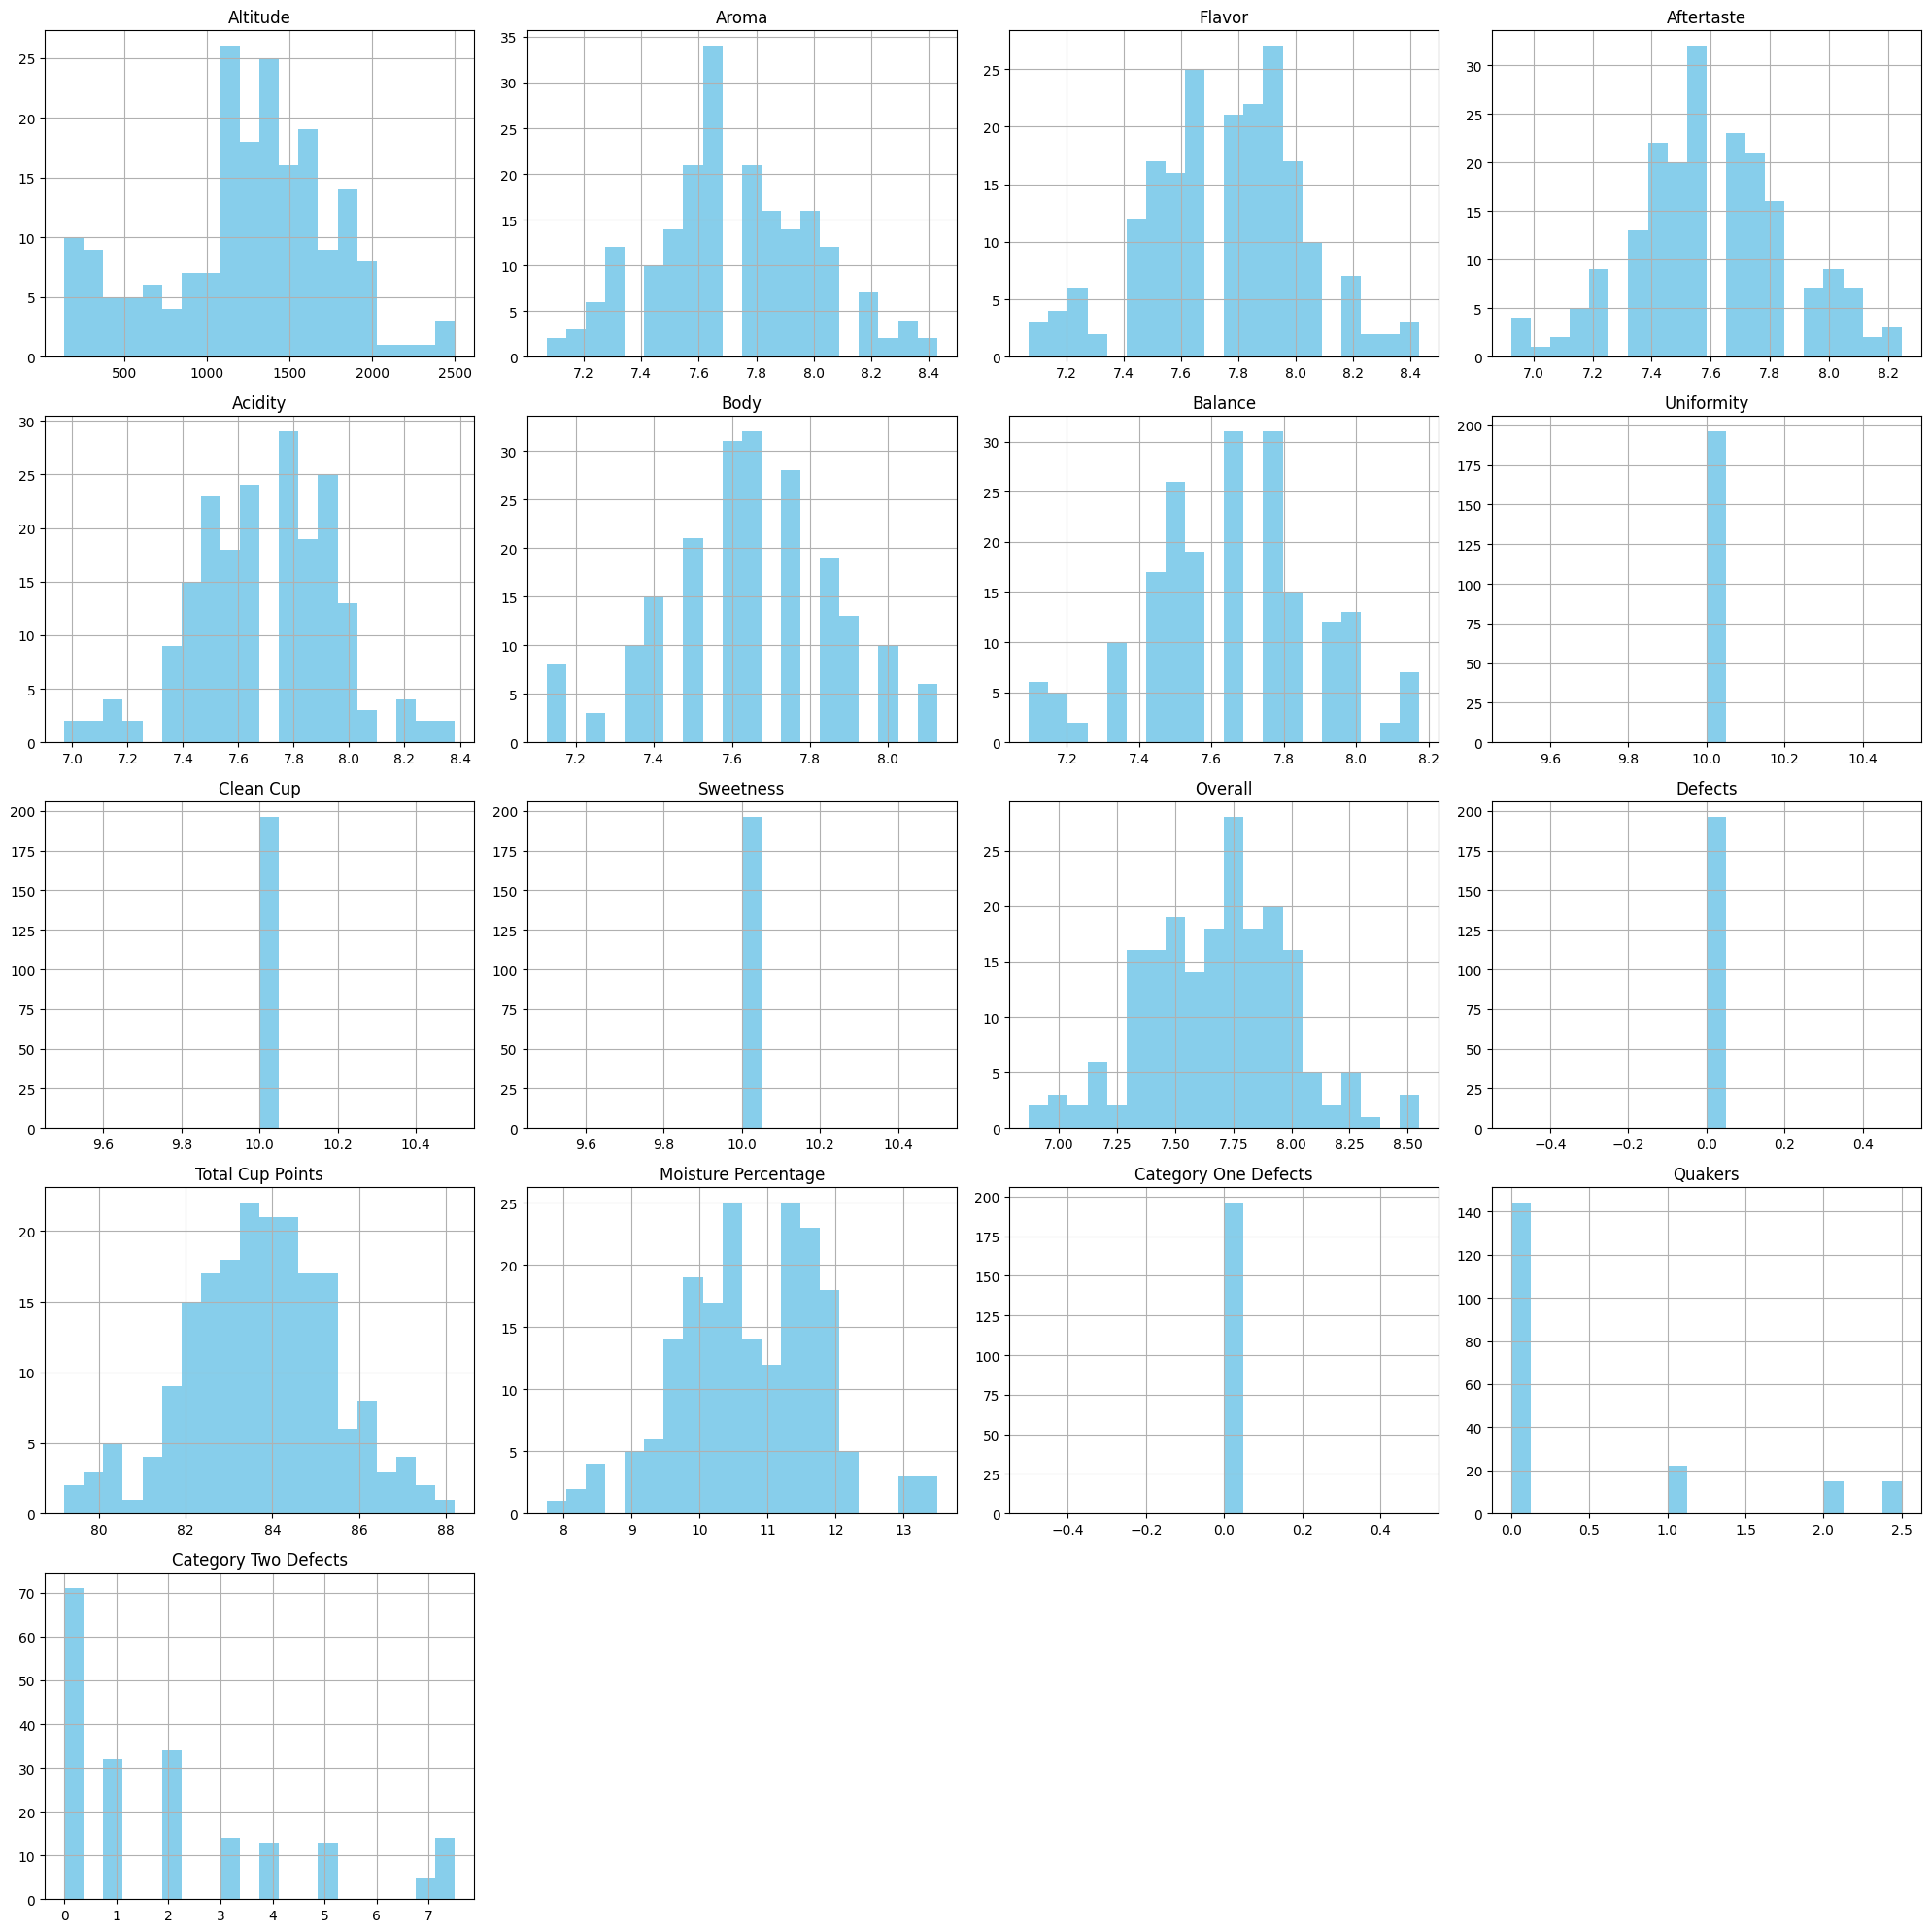

In [147]:
# Save numerical columns into a separate dataframe
numerical_values = df_clean.select_dtypes(include=[np.number])

# Detect outliers using the IQR method
Q1 = numerical_values.quantile(0.25)
Q3 = numerical_values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Number of outliers: {((numerical_values < lower_limit) | (numerical_values > upper_limit)).sum()}")

# Capping outliers
df_capped = numerical_values
for col in numerical_values.columns:
    df_capped[col] = numerical_values[col].clip(lower=lower_limit[col], upper=upper_limit[col])

print(f"Number of outliers after cleaning: {((df_capped > upper_limit) | (df_capped < lower_limit)).sum()}")

df_capped.hist(
    figsize=(20, 20),
    bins=20,
    color='skyblue',
    ec='black'
)

plt.tight_layout()
plt.show()



## Outlier Handling and Distribution

In this cell I used the interquantile range method of detecting outliers and later capped them to maintain clean distribution.

1. I isolated numerical columns from the dataset
2. Computed interquantile range by subtracting Q1 from Q3
3. Established upper and lower boundaries for values within +- 1.5 of interquantile range - values outside of these boundaries are considered outliers
4. I printed the number of values outside of boundaries (outliers) for each column
5. I capped outliers by replacing them with either lower or upper boundary, saved capped values into a new dataset.
6. Checked again by printing outliers - none were found, capping has been succesful.
7. From the outlier-free dataset I created histograms to check the distribution of numerical columns.

Most of the columns appear to be normally distributed, although we have some with Poisson distribution (Category Two Defects) or bimodal distribution (altitude).

Some columns contain only one value, such as "Sweetness" or "Defects", these will not be very useful for further analysis. Ulimately no column appears to be too skewed, therefore our outlier cleaning has been succesful.

In [148]:
non_numerical = df_clean.select_dtypes(exclude=[np.number])

# Merge numerical and non-numerical dataframes
df_clean = pd.concat([df_capped, non_numerical], axis=1)

# Save cleaned dataframe
df_clean.to_csv('df_clean.csv', index=False)



In this cell I merged again the capped numerical columns with the non-numerical ones.

I saved the cleaned dataset into a new csv file for clarity.

In [149]:
# Radar chart visualization of different flavor attributes

# Fileter coffees based on country
ethiopia_coffees = df_clean[df_clean["Country of Origin"] == "ethiopia"]
costarica_coffees = df_clean[df_clean["Country of Origin"] == "costa rica"]
brazil_coffees = df_clean[df_clean["Country of Origin"] == "brazil"]
guatemala_coffees = df_clean[df_clean["Country of Origin"] == "guatemala"]
mexico_coffees = df_clean[df_clean["Country of Origin"] == "mexico"]
taiwan_coffees = df_clean[df_clean["Country of Origin"] == "taiwan"]

# Calculate the mean of each flavor attribute
ethiopia_mean = ethiopia_coffees[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"]].mean()
costarica_mean = costarica_coffees[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"]].mean()
brazil_mean = brazil_coffees[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"]].mean()
guatemala_mean = guatemala_coffees[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"]].mean()
mexico_mean = mexico_coffees[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"]].mean()
taiwan_mean = taiwan_coffees[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"]].mean()



# Create radar chart

radar_chart = go.Figure()

radar_chart.add_trace(
    go.Scatterpolar(
        r=costarica_mean.values,
        theta=costarica_mean.index,
        name='Costa Rica',
        fill='toself',
        connectgaps=True
        
    )
)

radar_chart.add_trace(
    go.Scatterpolar(
        r=ethiopia_mean.values,
        theta=ethiopia_mean.index,
        name='Ethiopia',
        fill='toself',
        connectgaps=True
    )
)

radar_chart.add_trace(
    go.Scatterpolar(
        r=brazil_mean.values,
        theta=brazil_mean.index,
        name='Brazil',
        fill='toself',
        connectgaps=True
    )
)

radar_chart.add_trace(
    go.Scatterpolar(
        r=guatemala_mean.values,
        theta=guatemala_mean.index,
        name='Guatemala',
        fill='toself',
        connectgaps=True
    )
)

radar_chart.add_trace(
    go.Scatterpolar(
        r=mexico_mean.values,
        theta=mexico_mean.index,
        name='Mexico',
        fill='toself',
        connectgaps=True
    )
)

radar_chart.add_trace(
    go.Scatterpolar(
        r=taiwan_mean.values,
        theta=taiwan_mean.index,
        name='Taiwan',
        fill='toself',
        connectgaps=True
    )
)


radar_chart.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[7, 8.1]
        )
    ),
    showlegend=True,
    title="Coffee Flavor Profiles by Country",
)

radar_chart.show()




## Radar Chart Visualisation

I chose to visualize different flavor attributes of coffee beans from different countries to compare their overall quality and balance. Radar chart is fitting for this usecase as it allows us to visually compare qualities of different coffee beans.

Plotly Graph Objects API has this chart type already in-built + it allows for a degree of interactivity (toggle on/of different coffees).

To build the chart I started filtering coffees based on their "Country of Origin" column. I chose 6 countries that nicely represent coffee quality for this comparison. I proceeded with selecting flavor attribute columns and computing their mean for coffees of my selected countries.

Finally I initialized the chart object and populated it with data using the .add_trace() method. I also customized the chart layout using the .update_layout() method to update radius range, title and legend.

### Result

Resulting is a radar chart that contains 6 flavor attributes raging from 7 to 8.1. On top of this chart we can toggle coffee beans of different origin and see their average scores in these different flavor attributes. Just by viewing the area on the chart, we can estimate which beans did better on flavor tests.

Ethiopian coffees seem to gain highest points in almost all categories with Guatemalan and Taiwan coffees coming in next-best.

In [150]:
# Bubble map visualization of coffee producers

# Get the unique countries
countries = df_clean["Country of Origin"].unique()

# Calculate the number of coffees produced by each country
country_counts = df_clean["Country of Origin"].value_counts()

print(country_counts)
# Create a dictionary of country coordinates

coordinates = {
"taiwan": [23.69781, 120.960515],
"guatemala": [15.783471, -90.230759],
"colombia": [4.570868, -74.297333],
"honduras": [15.199999, -86.241905],
"thailand": [15.870032, 100.992541],
"ethiopia": [9.145, 40.489673],
"costa rica": [9.748917, -83.753428],
"brazil": [-14.235004, -51.92528],
"el salvador": [13.794185, -88.89653],
"nicaragua": [12.865416, -85.207229],
"tanzania, united republic of": [-6.369028, 34.888822],
"united states (hawaii)": [19.896766, -155.582782],
"mexico": [23.634501, -102.552784],
"vietnam": [14.058324, 108.277199],
"peru": [-9.189967, -75.015152],
"uganda": [1.373333, 32.290275],
"laos": [19.85627, 102.495496],
"panama": [8.537981, -80.782127],
"kenya": [-0.023559, 37.906193],
"indonesia": [-0.789275, 113.921327],
"madagascar": [-18.766947, 46.869107],
"myanmar": [21.913965, 95.956223],
}

# Create lists for the map
lats = [coordinates[country][0] for country in country_counts.index]
lons = [coordinates[country][1] for country in country_counts.index]
sizes = [count * 5 for count in country_counts.values]

# Create the bubble map
bubble_map = go.Figure(data=go.Scattergeo(
    lon=lons,
    lat=lats,
    text=[f"{country}: {count} coffees" for country, count in country_counts.items()],
    mode="markers",
    marker=dict(
        size=sizes,
        colorscale="Viridis",
        color=country_counts.values,
        showscale=True,
        sizemode="area",
        colorbar_title="Number of Coffees",
        sizeref=2.*max(country_counts.values)/(60**2), 
        sizemin=4, 
        cmin=1,     
        cmax=60 
    )
))

# Update the layout
bubble_map.update_layout(
    title="Coffee Samples Distribution by Country",
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="equirectangular",
        scope="world",
    ),
    width=1000,
    height=600
)

bubble_map.show()




Country of Origin
taiwan                          59
guatemala                       20
colombia                        16
honduras                        13
thailand                        12
ethiopia                        11
costa rica                       8
brazil                           8
el salvador                      7
nicaragua                        6
tanzania, united republic of     6
united states (hawaii)           5
mexico                           4
vietnam                          4
peru                             4
uganda                           3
laos                             3
panama                           2
kenya                            2
indonesia                        1
madagascar                       1
myanmar                          1
Name: count, dtype: int64


## Bubble Map Visualization

In this visualization I intended to showcase the numer of coffees in the dataset based on their contry of origin but this time on a color-coded bubble map.

The bubbles get bigger and change color from cooler tones to wormer based on the increasing amount of coffee samples from a country.

Chart creation process:
1. Filtered and calculated the numer of coffees from all countries.
2. Created a dictionary of coordinates for each country of origin.
3. Created lists of latitudes and longitudes. Calculated bubble sizes for the chart.
4. Initialized the bubble map via plotly API.
5. Fill in the chart properties and data.
6. Updated the chart layout by adding title and dimensions.

By viewing this chart we can estimate the coffee production intensity of each country and their representation in the dataset.

We can see by far the most represented country in the dataset is Taiwan

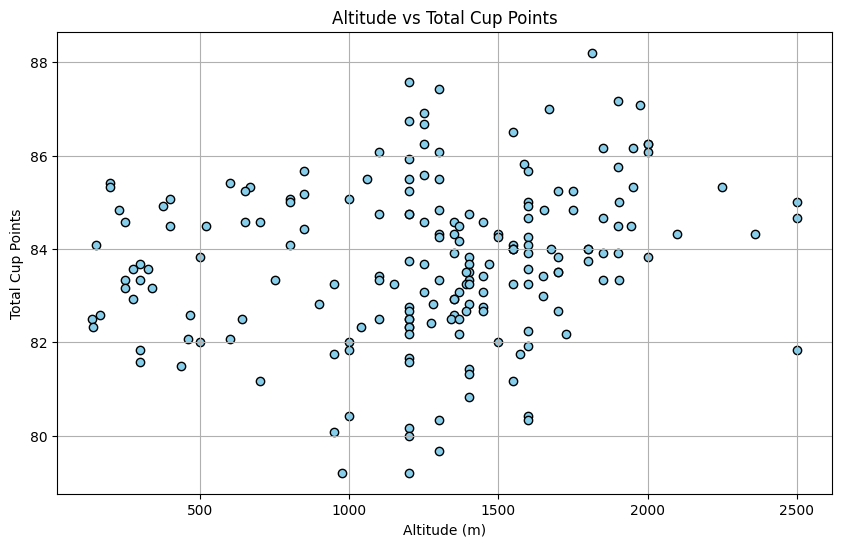

In [151]:
# Creating the visialization of altitude against total cup points

# Create a scatter plot
scatter_plot = plt.figure(figsize=(10, 6))
plt.scatter(df_clean["Altitude"], df_clean["Total Cup Points"], color='skyblue', edgecolors='black')
plt.xlabel("Altitude (m)")
plt.ylabel("Total Cup Points")
plt.title("Altitude vs Total Cup Points")
plt.grid(True)
plt.show()

## Scatterplot Visualization

This simple scatterplot visualization intends to showcase the relationship between the Altitude of coffee growth and the total cup points (an aggregate metric of coffee quality).

I used matplotlib scatterplot for this visualization. Column values from "Altitude" and "Total Cup Points" were passed into the chart. Layout of the chart was customized to add labels title and grid.

No clear relationship is visible by plotting these two variables.

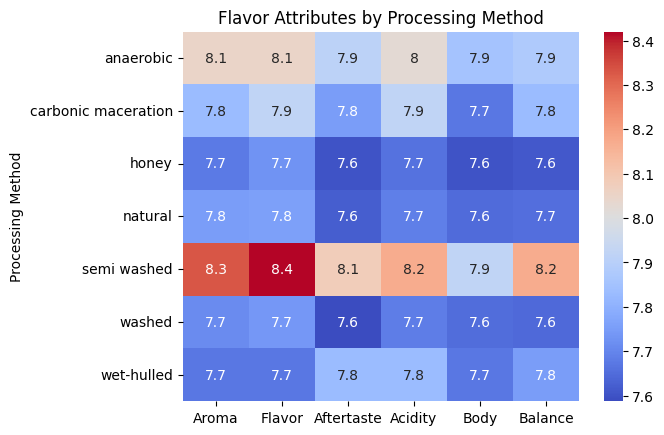

In [152]:
# Processing method vs flavor attributes heatmap

heatmap = sns.heatmap(df_clean.groupby("Processing Method")[["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"]].mean(), annot=True, cmap="coolwarm")
heatmap.set_title("Flavor Attributes by Processing Method")
plt.show()



## Heatmap Visualization

Another multi-variable visualization. This time I decided to compare the flavor attributed with provessing methods.

I grouped the data by processing method and computed means of all flavor attributes. This data was passed into the seaborn heatmap chart.

Title and labels were added to the chart. Notably the "sami wahsed" processing method seems to gain high scores in most flavor attributes.

/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_27308/1167432498.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




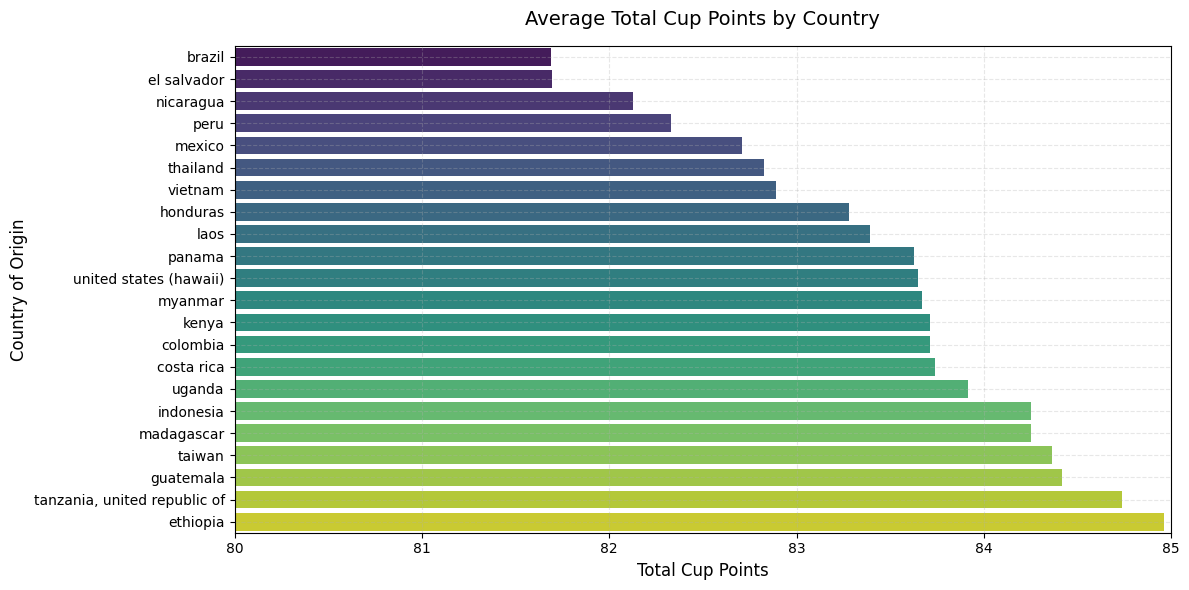

In [153]:
# Total cup points by country

# Gather the average total cup points by country and sort them

country_points = df_clean.groupby("Country of Origin")["Total Cup Points"].mean().reset_index()
country_points = country_points.sort_values("Total Cup Points", ascending=True)


# Create a bar chart

plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", n_colors=len(country_points))

bar_chart = sns.barplot(
    data=country_points,
    x="Total Cup Points",
    y="Country of Origin",
    palette=colors,
    orient="h"
)

plt.title("Average Total Cup Points by Country", pad=15, fontsize=14)
plt.xlabel("Total Cup Points", fontsize=12)
plt.ylabel("Country of Origin", fontsize=12)
plt.xlim(80, 85)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Bar Chart Visualization

This barchart illustrates the mean value of "total cup points" for all countries in the dataset. I started by grouping data by their country of origin and computed the mean of total cup points.

This country_points dataframe was plotted on an inverted bar chart with some color coding for visual clarity. I adjusted the barchart by adding title, labels, custom limits, etc.

We can see that findings of this barchart correspond with findings from the radar chart flavor attributes.

## High-Level Analysis of Results

### Key Findings

I found that generally coffees tend to be pretty balanced in flavour and aroma attributes. **Ethiopian coffees** seems to be generally *best in most attributes*, but are also comparatively **more acidic** than others, which may not be suitable for some people. Guatemalan coffees are also taking up the top positions with a more balanced, less acidic and more flavorful taste.

Bar chart results of total cup points suggest that Ethiopian coffees are indeed the highest ranking ones, while **Brazilian coffees** (although very popular) rank the *lowest*. A suprisingly large production of coffees is located in Taiwan (the biggest in this dataset), following up with Central/South America and Africa. It seems that African production of coffee is less intense and higher in overall quality.

No *statistically significant* relationship was found between **coffee quality** and the **altitude** that the beans grow in. The taste is more likely to be influenced by other factors.

**Processing methods** were similar in terms of finished product flavour, although one method stood out - the *semi-washed* method. Coffees produced by this method have higher rankings among all *flavor attributes*. The *anaerobic* processing method, a kind of new and experimental approach in specialty coffee, is also ranking highly in most categories. On the other hand the "*honey*" processing method scored the lowest.

### Customer Guide

I intended this analysis as a "*customer guide*" to help retail decide which coffee beans are worth buying. The radar chart can help customers figure out a closely-matched coffee for their taste expectations.

From customer perspective, according to coffee quality data of 2021 to 2023, the answer is **Ethiopian coffee semi-washed**. Of course the price might also be a determining factor for consumer behaviour and might be interesting for further analysis.

**Guatemalan and Tanzanian coffees** also pose a great choice for those seeking high-quality beans.

### Limitations

This coffee quality dataset contains mostly data from **2021 to 2023**. Some countries are underrepresented, which can be due to lower production or difficult tracking. Coffee taste rankings represent *subjective opinion* of tasters. Some columns, like "*Sweetness*" contain only a single value (I suppose erroneous).

It is important to say that the differences between coffee *flavor attributes* are not big and even Brazilian specialty coffees achieve notably high results. The scales have been adjusted in order to clearly showcase the differences between countries of origin. No roast level data were included in the dataset (possibly a determining factor).


